In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [5]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [13]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thrirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [16]:
# Printing the simulation input data
MC_thrirtyyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [17]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thrirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/wilsonquizhpi/API-HW/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008427,1.006544,0.995463,1.005260,1.002503,1.001864,1.008801,1.016108,0.994106,0.998771,...,0.996735,0.995174,1.002839,1.006477,0.994003,0.996979,0.989028,0.993856,0.998201,1.009169
2,1.013257,1.010868,0.990415,1.012595,0.996696,0.996502,1.000685,1.017419,0.994980,1.002110,...,1.001409,0.995254,1.002421,1.002706,1.003733,0.996045,0.991419,0.995029,0.997819,1.020506
3,1.013509,1.006475,0.992747,1.021907,0.999196,0.997255,1.001090,1.007159,0.984105,1.001717,...,0.998270,0.996675,1.000713,1.007721,1.005810,0.995743,0.986396,1.011422,0.991941,1.011495
4,1.012639,1.014461,0.983687,1.017350,0.991162,0.999133,0.992172,1.017863,0.987726,1.007721,...,0.999178,0.998419,0.988246,1.005760,1.002913,0.986555,0.992210,1.011267,0.980314,1.021312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.254400,5.259840,6.263237,6.095137,8.120920,6.441050,12.704996,5.872550,15.966053,12.158539,...,6.426690,16.708648,10.356698,5.781346,9.408074,7.869143,12.549593,14.448191,7.017477,8.959035
7557,7.209727,5.242543,6.247554,6.145716,8.116740,6.410509,12.665095,5.860329,15.981843,12.126618,...,6.364736,16.678653,10.339706,5.801912,9.452021,7.897654,12.653753,14.506249,7.080278,8.979091
7558,7.287182,5.271229,6.241410,6.096310,8.174470,6.400791,12.638683,5.845147,15.944389,12.269587,...,6.344050,16.682351,10.375781,5.739750,9.464249,7.898104,12.716645,14.395216,7.052096,9.021303
7559,7.326413,5.272919,6.260445,6.123696,8.230140,6.395015,12.522378,5.878161,16.012577,12.266501,...,6.315372,16.657901,10.339172,5.735606,9.513076,7.879559,12.683202,14.504030,7.097077,8.976068


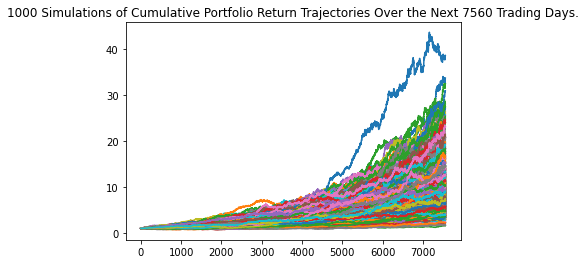

In [18]:
# Plot simulation outcomes
line_plot = MC_thrirtyyear.plot_simulation()

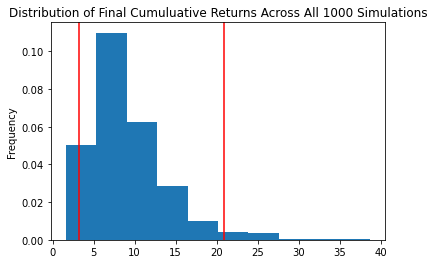

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thrirtyyear.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thrirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               9.103312
std                4.700307
min                1.615697
25%                5.907806
50%                8.083109
75%               11.116048
max               38.667457
95% CI Lower       3.281115
95% CI Upper      20.877958
Name: 7560, dtype: float64


In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65622.29 and $417559.16


In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $98433.44 and $626338.73


In [ ]:
## 5 Years Planning
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/wilsonquizhpi/API-HW/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999972,1.001201,0.997644,1.006852,1.000417,1.003812,0.995927,1.005837,0.997127,1.006094,...,1.004084,0.994195,0.996914,1.002432,1.000878,1.008629,0.994957,0.999479,0.990277,0.996523
2,1.006029,0.999954,0.999165,1.014124,0.992889,0.999404,0.997857,1.016389,1.001620,0.996337,...,1.000786,0.988859,1.004274,1.001765,0.999384,1.008023,1.000789,0.995791,0.986008,0.999330
3,1.010807,0.999043,1.000691,1.013253,0.986854,0.993523,1.001084,1.015170,0.992587,0.985371,...,0.993678,0.986486,1.007985,1.011063,0.991853,0.998564,0.992070,1.000008,0.987597,0.994079
4,1.014690,0.997916,1.002986,1.012643,0.990328,0.993709,1.003749,1.022489,1.001147,0.981645,...,0.991165,0.983831,1.003380,1.001863,0.998382,0.992390,0.987099,0.995772,0.988945,0.985484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.232880,6.336083,6.795460,13.398582,6.246214,11.128230,5.623543,11.330666,8.891157,9.917378,...,23.565106,9.361292,3.592157,19.669151,11.901581,3.595296,15.330839,6.111922,3.535099,4.477067
7557,5.244644,6.399303,6.812834,13.293006,6.239732,11.165093,5.603138,11.305091,8.908121,9.927337,...,23.481945,9.419900,3.605854,19.672308,11.891163,3.599030,15.328485,6.209463,3.529836,4.474526
7558,5.246032,6.472973,6.780368,13.207353,6.241966,11.253199,5.635613,11.334029,8.878648,9.914358,...,23.544533,9.399977,3.597834,19.904559,11.859247,3.578012,15.517518,6.152330,3.535903,4.492090
7559,5.237035,6.501653,6.797324,13.259162,6.167923,11.299824,5.637444,11.503450,8.959092,9.970987,...,23.448280,9.416277,3.585232,19.736602,11.815742,3.571800,15.607891,6.183653,3.525240,4.507041


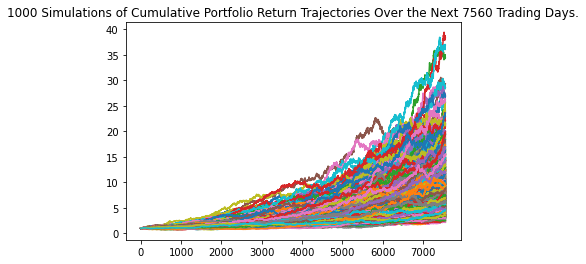

In [38]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

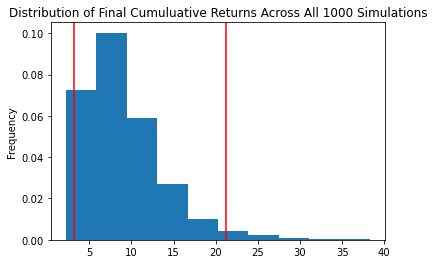

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl1 = MC_thrirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl1)

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)


print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")